## keras-CNN-室內室外二分類-預測

# 引入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, image
from keras import layers
from keras import models
from keras.layers import Dropout
from keras import optimizers
from keras.models import load_model

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


# 定義路徑

In [2]:
# 訓練資料路徑
train_dir = './data/train/'
# 驗證資料路徑
validation_dir = './data/validation/'
# 測試資料路徑
test_dir = './data/test/'
# 模型路徑
model_file_name = './model/indoor_outdoor_model.h5'

# 定義預測函式

In [3]:
def predict(img_path):
    model = load_model(model_file_name)
    print(model.summary())
    
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = img_tensor / 255
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # 形狀 (1, 150, 150, 3)
    plt.imshow(img_tensor[0])
    plt.show()
 
    result = model.predict(img_tensor)
    print(result)

# 定義預測結果和圖顯示出來

In [4]:
# 顯示出預測結果
def result(model, count):
    # 圖像預處理
    test_datagen = ImageDataGenerator(rescale=1. / 255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=256,
        class_mode='binary')
 
    text_labels = []
    plt.figure(figsize=(30, 20))
    # 取第一個結果
    for batch, label in test_generator:
        pred = model.predict(batch)
        for i in range(count):
            true_reuslt = label[i]
            print('true_reuslt',true_reuslt)
            print('pred:',pred[i])
            print('==='*40)
            if pred[i] > 0.5:
                text_labels.append('outdoor')
            else:
                text_labels.append('indoor')
 
            # 4列，畫圖
            plt.subplot(count / 4 + 1, 4, i + 1)
            plt.title('predict: ' + text_labels[i])
            imgplot = plt.imshow(batch[i])
 
        plt.show()
 
        break

# 開始預測


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
________________________

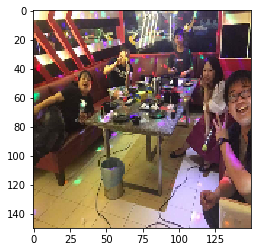

[[0.15273641]]
Found 12 images belonging to 2 classes.
true_reuslt 0.0
pred: [0.33064675]
true_reuslt 1.0
pred: [0.6801903]
true_reuslt 0.0
pred: [0.23942247]
true_reuslt 1.0
pred: [0.7229351]
true_reuslt 1.0
pred: [0.6683042]
true_reuslt 1.0
pred: [0.5192394]
true_reuslt 1.0
pred: [0.38204646]
true_reuslt 0.0
pred: [0.15273637]
true_reuslt 1.0
pred: [0.7929306]
true_reuslt 0.0
pred: [0.20754158]


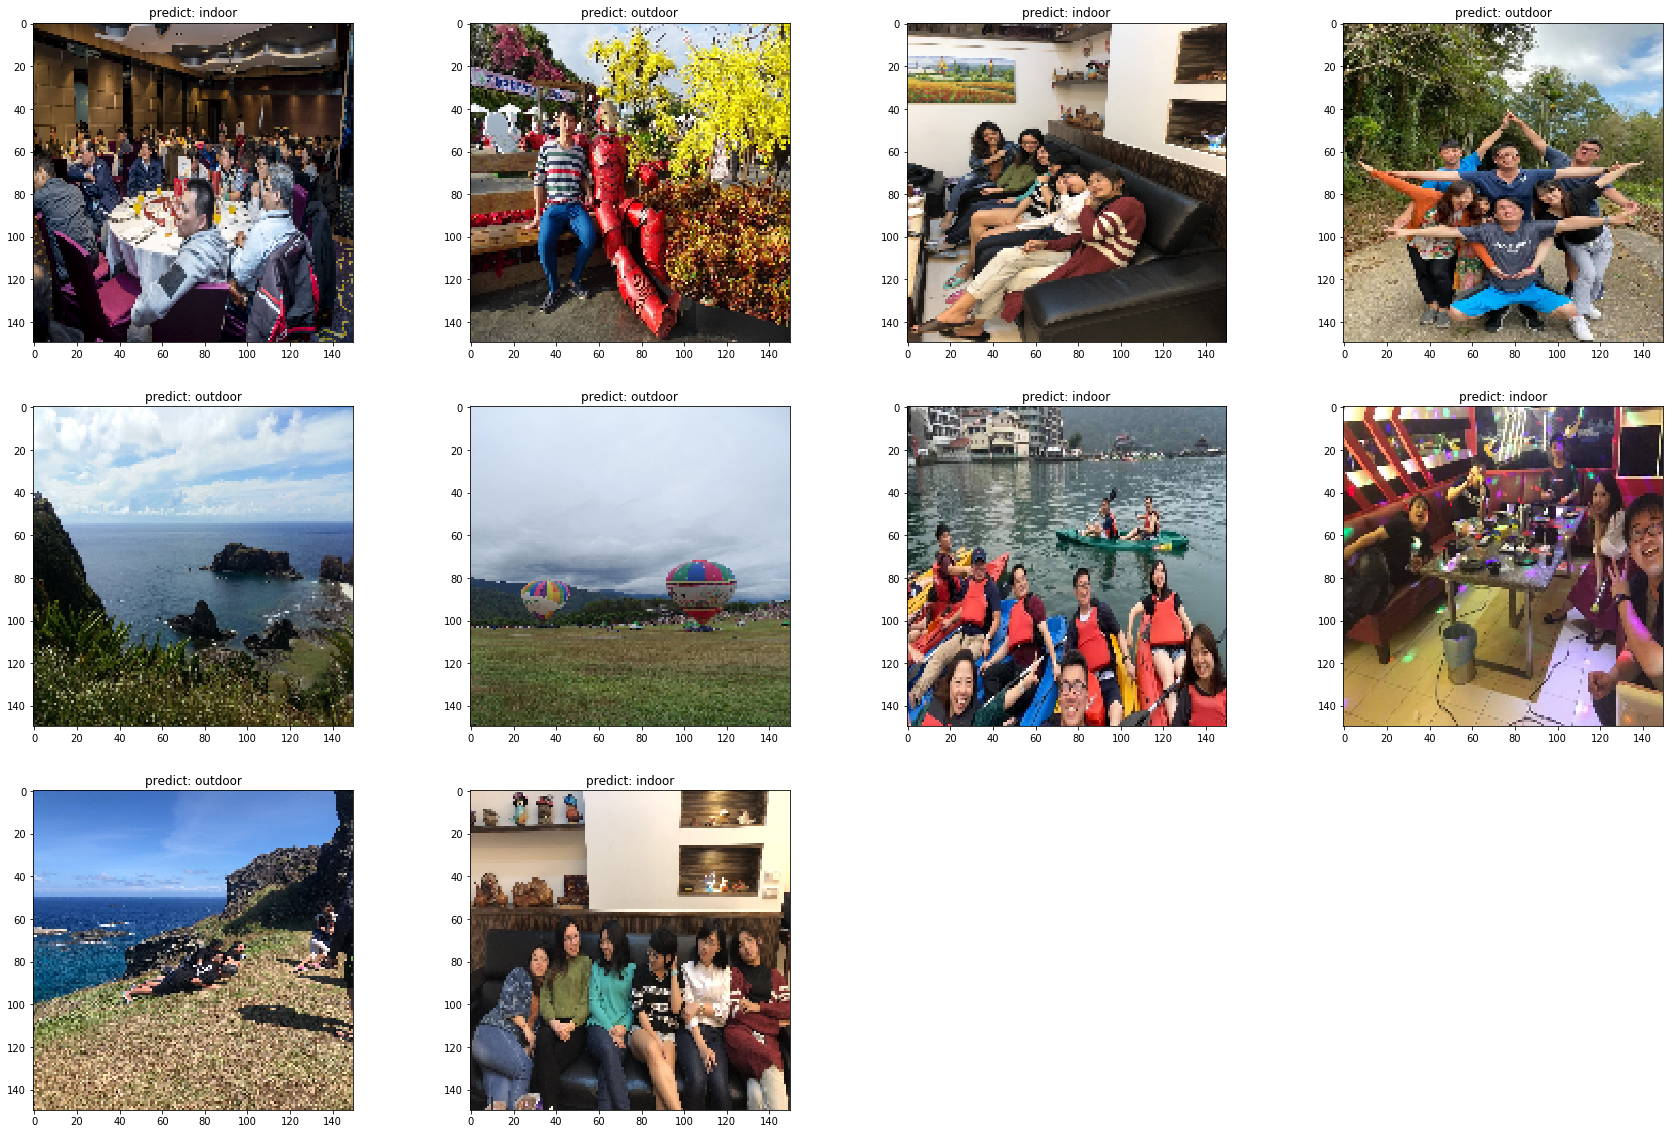

In [5]:
# 利用訓練好的模型預測結果
img_path = test_dir + 'indoor/5108056016_2.jpg'
predict(img_path)

model = load_model(model_file_name)
# 隨機查看5個預測結果並畫出來
result(model, 10)